In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

In [20]:
street_map = gpd.read_file('Minneapolis_LandCover.shp')

<AxesSubplot:>

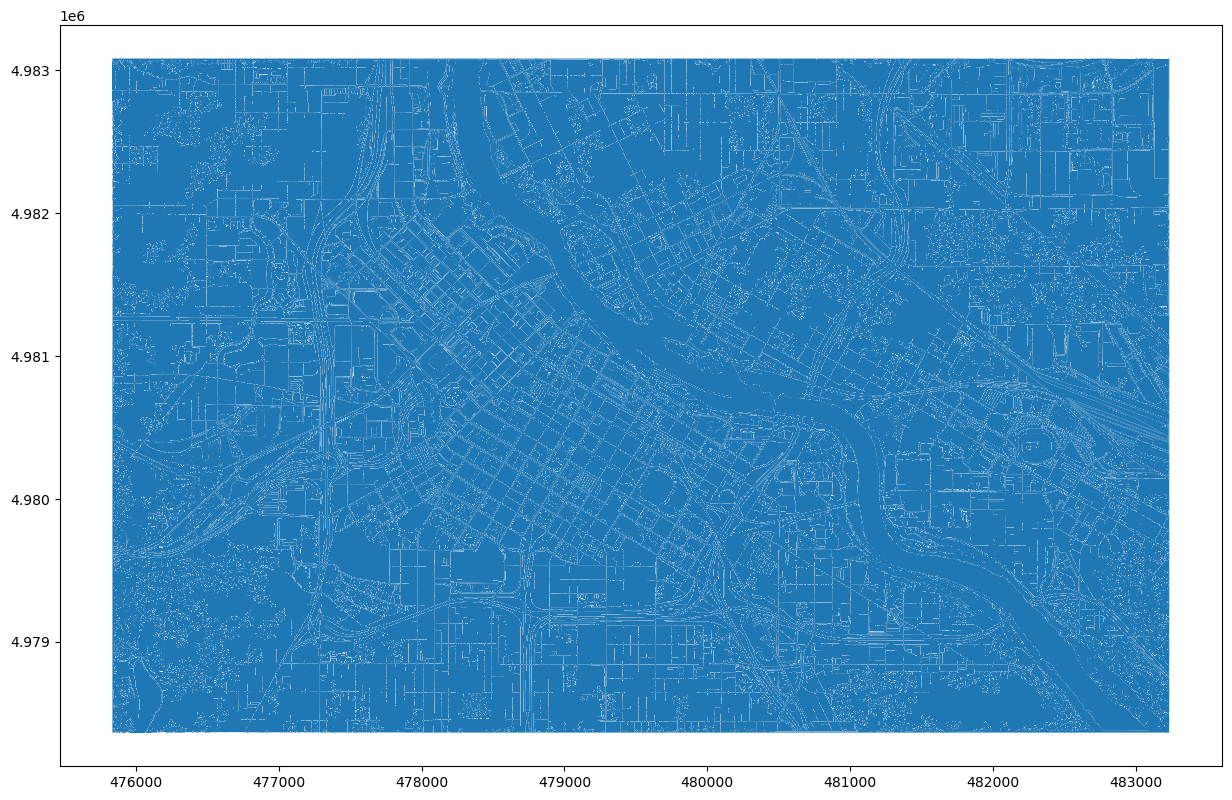

In [19]:
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax)

In [21]:
df = pd.read_csv('../Crime_Data.csv')
crs = {'init':'epsg:4326'}
df.head()


,X,Y,Type,Case_Number,Case_NumberAlt,Reported_Date,Occurred_Date,NIBRS_Crime_Against,NIBRS_Group,NIBRS_Code,...,Address,Precinct,Neighborhood,Ward,Latitude,Longitude,wgsXAnon,wgsYAnon,Crime_Count,OBJECTID
0,-93.239958,44.969918,Additional Crime Metrics,19-005590,MP20195590,2019/01/06 17:35:00+00,2019/01/06 16:40:00+00,Non NIBRS Data,Non NIBRS Data,Non NIBRS Data,...,0021XX 4TH ST S,1.0,Cedar Riverside,2.0,44.96992,-93.23996,-1.037942e+07,5.616787e+06,1,1
1,-93.305717,45.015933,Additional Crime Metrics,19-007812,MP20197812,2019/01/08 21:17:00+00,2019/01/08 20:30:00+00,Non NIBRS Data,Non NIBRS Data,Non NIBRS Data,...,0033XX NEWTON AVE N,4.0,Folwell,4.0,45.01593,-93.30572,-1.038674e+07,5.624030e+06,1,2
2,-93.301225,45.035447,Additional Crime Metrics,19-020584,MP201920584,2019/01/22 00:13:00+00,2019/01/21 23:00:00+00,Non NIBRS Data,Non NIBRS Data,Non NIBRS Data,...,0016XX 44TH AVE N,4.0,Webber - Camden,4.0,45.03545,-93.30123,-1.038624e+07,5.627104e+06,1,3
3,-93.227268,44.899345,Additional Crime Metrics,19-033712,MP201933712,2019/02/04 14:55:00+00,2019/02/04 13:30:00+00,Non NIBRS Data,Non NIBRS Data,Non NIBRS Data,...,0057XX 31ST AVE S,3.0,Wenonah,11.0,44.89935,-93.22727,-1.037801e+07,5.605689e+06,1,4
4,-93.304439,45.004676,Additional Crime Metrics,19-034524,MP201934524,2019/02/05 12:46:00+00,2019/02/05 10:00:00+00,Non NIBRS Data,Non NIBRS Data,Non NIBRS Data,...,0024XX MORGAN AVE N,4.0,Jordan,5.0,45.00468,-93.30444,-1.038660e+07,5.622258e+06,1,5


In [27]:
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]


In [28]:
geo_df = gpd.GeoDataFrame(df, #specify our data
                          crs=crs, #specify our coordinate reference system
                          geometry=geometry) #specify the geometry list we created

#geo_df.dropna(inplace=True)
geo_df.dropna(inplace=True)

geo_df.dtypes

/Users/aaronotto/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


X                       float64
Y                       float64
Type                     object
Case_Number              object
Case_NumberAlt           object
Reported_Date            object
Occurred_Date            object
NIBRS_Crime_Against      object
NIBRS_Group              object
NIBRS_Code               object
Offense_Category         object
Offense                  object
Problem_Initial          object
Problem_Final            object
Address                  object
Precinct                float64
Neighborhood             object
Ward                    float64
Latitude                float64
Longitude               float64
wgsXAnon                float64
wgsYAnon                float64
Crime_Count               int64
OBJECTID                  int64
geometry               geometry
dtype: object

In [32]:
geo_df.dropna()

,X,Y,Type,Case_Number,Case_NumberAlt,Reported_Date,Occurred_Date,NIBRS_Crime_Against,NIBRS_Group,NIBRS_Code,...,Precinct,Neighborhood,Ward,Latitude,Longitude,wgsXAnon,wgsYAnon,Crime_Count,OBJECTID,geometry
0,-93.239958,44.969918,Additional Crime Metrics,19-005590,MP20195590,2019/01/06 17:35:00+00,2019/01/06 16:40:00+00,Non NIBRS Data,Non NIBRS Data,Non NIBRS Data,...,1.0,Cedar Riverside,2.0,44.96992,-93.23996,-1.037942e+07,5.616787e+06,1,1,POINT (-93.23996 44.96992)
1,-93.305717,45.015933,Additional Crime Metrics,19-007812,MP20197812,2019/01/08 21:17:00+00,2019/01/08 20:30:00+00,Non NIBRS Data,Non NIBRS Data,Non NIBRS Data,...,4.0,Folwell,4.0,45.01593,-93.30572,-1.038674e+07,5.624030e+06,1,2,POINT (-93.30572 45.01593)
2,-93.301225,45.035447,Additional Crime Metrics,19-020584,MP201920584,2019/01/22 00:13:00+00,2019/01/21 23:00:00+00,Non NIBRS Data,Non NIBRS Data,Non NIBRS Data,...,4.0,Webber - Camden,4.0,45.03545,-93.30123,-1.038624e+07,5.627104e+06,1,3,POINT (-93.30123 45.03545)
3,-93.227268,44.899345,Additional Crime Metrics,19-033712,MP201933712,2019/02/04 14:55:00+00,2019/02/04 13:30:00+00,Non NIBRS Data,Non NIBRS Data,Non NIBRS Data,...,3.0,Wenonah,11.0,44.89935,-93.22727,-1.037801e+07,5.605689e+06,1,4,POINT (-93.22727 44.89935)
4,-93.304439,45.004676,Additional Crime Metrics,19-034524,MP201934524,2019/02/05 12:46:00+00,2019/02/05 10:00:00+00,Non NIBRS Data,Non NIBRS Data,Non NIBRS Data,...,4.0,Jordan,5.0,45.00468,-93.30444,-1.038660e+07,5.622258e+06,1,5,POINT (-93.30444 45.00468)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223098,-93.307654,44.986083,Shots Fired Calls,23-068907,MP202368907,2023/03/22 20:18:56+00,2023/03/22 20:18:56+00,Non NIBRS Data,Non NIBRS Data,Non NIBRS Data,...,4.0,Near - North,5.0,44.98608,-93.30765,-1.038696e+07,5.619331e+06,1,223099,POINT (-93.30765 44.98608)
223100,-93.298282,45.029516,Shots Fired Calls,23-071207,MP202371207,2023/03/25 02:35:00+00,2023/03/25 02:35:00+00,Non NIBRS Data,Non NIBRS Data,Non NIBRS Data,...,4.0,Webber - Camden,4.0,45.02952,-93.29828,-1.038592e+07,5.626169e+06,1,223101,POINT (-93.29828 45.02952)
223107,-93.275990,44.941353,Shots Fired Calls,23-076875,MP202376875,2023/03/31 02:59:35+00,2023/03/31 02:59:35+00,Non NIBRS Data,Non NIBRS Data,Non NIBRS Data,...,5.0,Lyndale,8.0,44.94135,-93.27599,-1.038344e+07,5.612293e+06,1,223108,POINT (-93.27599 44.94135)
223116,-93.276582,44.964583,Shots Fired Calls,23-087540,MP202387540,2023/04/10 23:00:24+00,2023/04/10 23:00:24+00,Non NIBRS Data,Non NIBRS Data,Non NIBRS Data,...,5.0,Steven's Square - Loring Heights,6.0,44.96458,-93.27658,-1.038350e+07,5.615948e+06,1,223117,POINT (-93.27658 44.96458)


<AxesSubplot:>

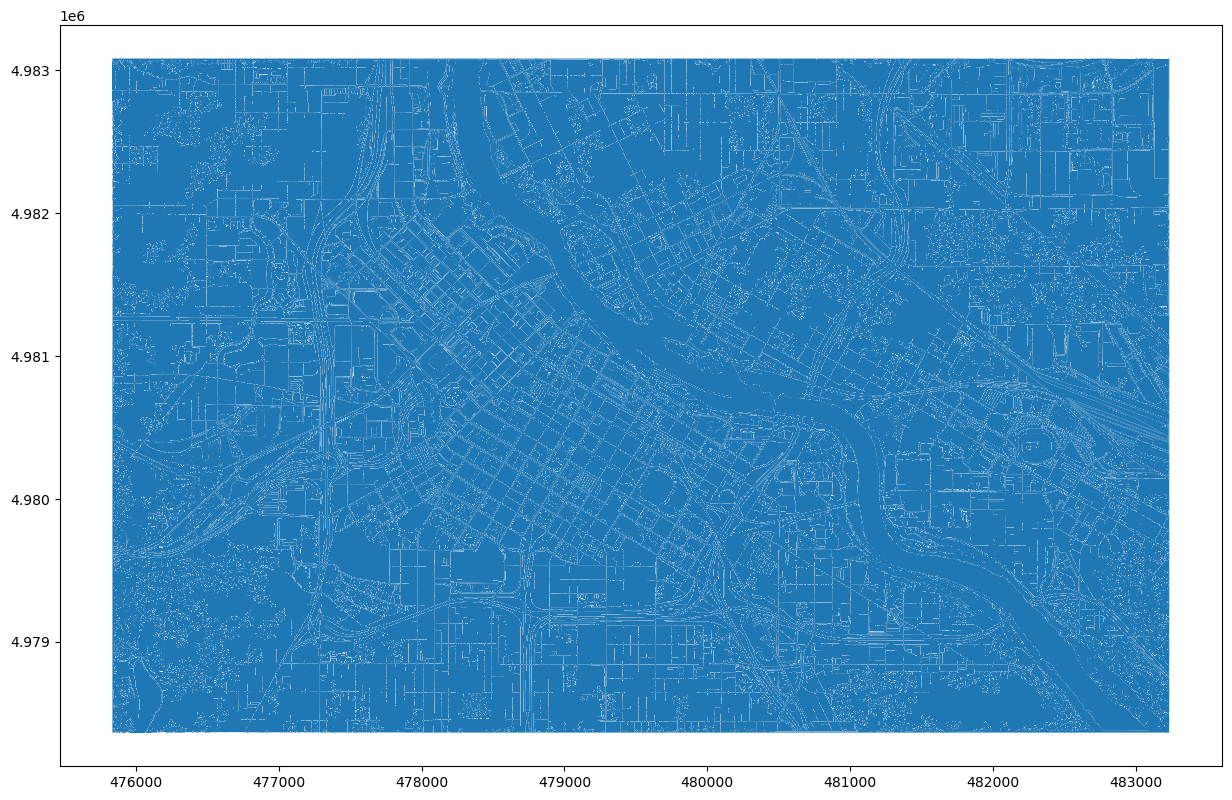

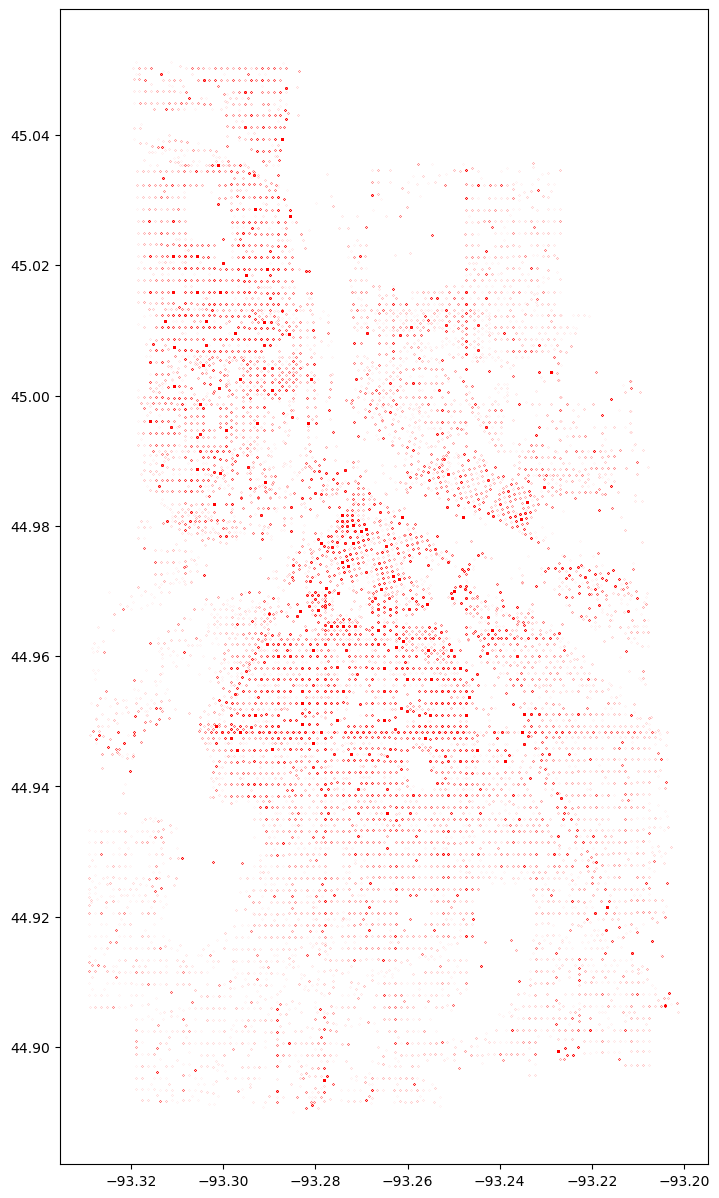

In [47]:
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax)
geo_df.plot(markersize = .001, color ='red', figsize=(15,15))

In [33]:
# fig, ax = plt.subplots(figsize=(15, 15))
# street_map.plot(ax=ax, alpha=0.4, color='blue')


# geo_df[Crime_Count'.plot(ax=ax,
#                                 markersize=20,
#                                 color='red',
#                                 marker='o',
#                                 label='Neg')

# # geo_df[geo_df['WnvPresent'] == 1].plot(ax=ax,
# #                                        markersize=20,
# #                                        color='red',
# #                                        marker='^',
# #                                        label='Pos')

# plt.legend(prop={'size': 15})



SyntaxError: invalid syntax (1090585329.py, line 5)